<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>**Classification - Face Identification**</center>

----
# **Table of Contents:**

---

**1.** [**Introduction**](#section1)<br>
**2.** [**Importing Packages**](#section2)<br>
**3.** [**Loading Data**](#section3)<br>
  - **3.1** [**Description of the Dataset**](#section301)

**4.** [**Data Preprocessing**](#section4)<br>
**5.** [**Model Building**](#section5)<br>
**6.** [**Model Building using Transfer Learning**](#section5)<br>
**7.** [**Prediction on test set**](#section6)<br>
**8.** [**Conclusion**](#section7)

<a id=section1></a>
# **1. Introduction**

**The client for this project is the Administration Department at AutoBox having over a thousand employees.**

They want to maintain a central database of all of their employees.
And, extra emphasis is on increasing security and ease of operation.
The idea is to create a web-based app for Facial Recognition in order to have rightful entry to the office premises and restrict any trespassers.
Once the employees are identified on a daily basis, they can have a simple entry and exit procedure without any manual intervention.
They want to deal with their existing employee’s database and those coming in as a new recruit.

**Current Practice:**

The existing employees or the ones joining the Company gets a card having a QR(RFID) code with unique identification for entry and exit.

The current practice suffers from the following problems:

This approach is too haphazard. The quality of insight gained is misaligned due to misleading data.
The second problem is these insights can't be aggregated to frame certain policies on this.
The third problem is the security breach of the Company, which can hamper the situation very badly.

The Admin Department has hired you as an AI Engineer. They want to supplement their security protocols with a more proactive approach.

**Problem Specifics**

**Deliverable:** Predict whether the person will be allowed entry or exit into the company premises.

Deep Learning task: Build a Face Recognition model using FaceNet

Target: Predict the name of the person in the image.

**Win condition:** The model should be able to recognize the person present in the images, and if the model hasn’t seen a person before, it should output a message suggesting that this person is not found in the database and entry is restricted, and label it as Unidentified in the submission file.

<a id=section2></a>
# **2. Importing and Installing Libraries**

In [1]:
pip install pillow

In [2]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img


In [4]:
from PIL import Image
import sys
import glob 
from skimage import io 
from keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array #Keras dataset generator class.
from os.path import isdir
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from numpy import load
from numpy import expand_dims
from random import choice
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot

<a id=section3></a>
# **3. Loading Dataset**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/INSAIDCapstoneProject/data/train

Amarnath_Ch	       Bill_Gates      Jennifer_Aniston    Tiger_Woods
Angelina_Jolie	       David_Beckham   Jennifer_Lopez	   Vladimir_Putin
Arnold_Schwarzenegger  George_W_Bush   Michael_Schumacher  Winona_Ryder
Atal_Bihari_Vajpayee   Harish_Purohit  Naomi_Watts
Bill_Clinton	       Harshada_Mali   Serena_Williams


In [ ]:
!ls /content/drive/MyDrive/INSAIDCapstoneProject/data/val

Amarnath_Ch	       Bill_Gates      Jennifer_Aniston    Tiger_Woods
Angelina_Jolie	       David_Beckham   Jennifer_Lopez	   Vladimir_Putin
Arnold_Schwarzenegger  George_W_Bush   Michael_Schumacher  Winona_Ryder
Atal_Bihari_Vajpayee   Harish_Purohit  Naomi_Watts
Bill_Clinton	       Harshada_Mali   Serena_Williams


In [6]:
label = ['Amarnath_Ch' , 'Bill_Gates', 'Jennifer_Aniston', 'Angelina_Jolie', 'David_Beckham', 'Jennifer_Lopez' , 'Tiger_Woods' , 'Arnold_Schwarzenegger' , 'George_W_Bush' , 'Michael_Schumacher' , 'Vladimir_Putin' , 'Atal_Bihari_Vajpayee' , 'Harish_Purohit' ,'Naomi_Watts' , 'Winona_Ryder' , 'Bill_Clinton' , 'Harshada_Mali' , 'Serena_Williams']
label.sort()
label

['Amarnath_Ch',
 'Angelina_Jolie',
 'Arnold_Schwarzenegger',
 'Atal_Bihari_Vajpayee',
 'Bill_Clinton',
 'Bill_Gates',
 'David_Beckham',
 'George_W_Bush',
 'Harish_Purohit',
 'Harshada_Mali',
 'Jennifer_Aniston',
 'Jennifer_Lopez',
 'Michael_Schumacher',
 'Naomi_Watts',
 'Serena_Williams',
 'Tiger_Woods',
 'Vladimir_Putin',
 'Winona_Ryder']

The most common way of storing these images are in form of arrays of numbers, where these numbers represent the different levels of activations of the primary colours,i.e, Red, Green and Blue (RGB).

The images are usually stored in the RGB format because these are the primary colours and any colour can then be generated from these colours by varying the activations of these colours.

In a nutshell, there are 3 different 2D arrays, each corresponding to one colour out of RGB.

Reading an Image

Here we use the OpenCV library to read in the images and then view them and we try to make small tweaks and manipulations to it.

In [ ]:
img=cv2.imread('/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Angelina_Jolie/Angelina_Jolie_0002.jpg')

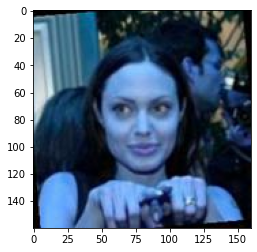

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(160, 160, 3)

In [7]:
dataset_path_train = '/content/drive/MyDrive/INSAIDCapstoneProject/data/train'

In [8]:
img_path_train=[]
for i in label:
  # glob through the directory (returns a list of all file paths)
  list_image_train = os.path.join(dataset_path_train, i, '*')
  img_path_train.extend(glob.glob(list_image_train))#  access some element (a file) from the list

In [ ]:
img_path_train

['/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20210101.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20190510.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_2112.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20190507.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20190511.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_201905101.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20201219.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20200410.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Angelina_Jolie/Angelina_Jolie_0018.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Angelina_Jolie/Angelina_Jolie_0015.jpg',
 '/content/drive/MyDrive/INSA

In [9]:
dataset_path_val = '/content/drive/MyDrive/INSAIDCapstoneProject/data/val'

In [10]:
img_path_val=[]
for i in label:
  # glob through the directory (returns a list of all file paths)
  list_image_val = os.path.join(dataset_path_val, i, '*')
  img_path_val.extend(glob.glob(list_image_val))#  access some element (a file) from the list

In [ ]:
img_path_val

['/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Amarnath_Ch/Amarnath_Ch_20211114.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Amarnath_Ch/Amarnath_Ch_202108151.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Amarnath_Ch/Amarnath_Ch_20210705.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Amarnath_Ch/Amarnath_Ch_20210614.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Angelina_Jolie/Angelina_Jolie_0010.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Angelina_Jolie/Angelina_Jolie_0017.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Angelina_Jolie/Angelina_Jolie_0007.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Angelina_Jolie/Angelina_Jolie_0020.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Angelina_Jolie/Angelina_Jolie_0001.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/val/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0015.jpg',
 '/content/drive/MyDriv

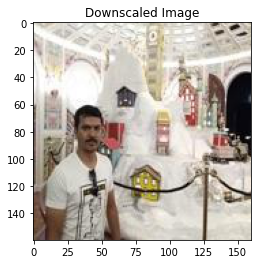

Resized Shape (160, 160, 3)


In [ ]:
width = 160
height = 160
dims = (width, height)
resized_down = cv2.resize(image, dims)      # Provide Image, Expected Dimension 
plt.imshow(resized_down)
plt.title('Downscaled Image')
plt.show()
print('Resized Shape',resized_down.shape)

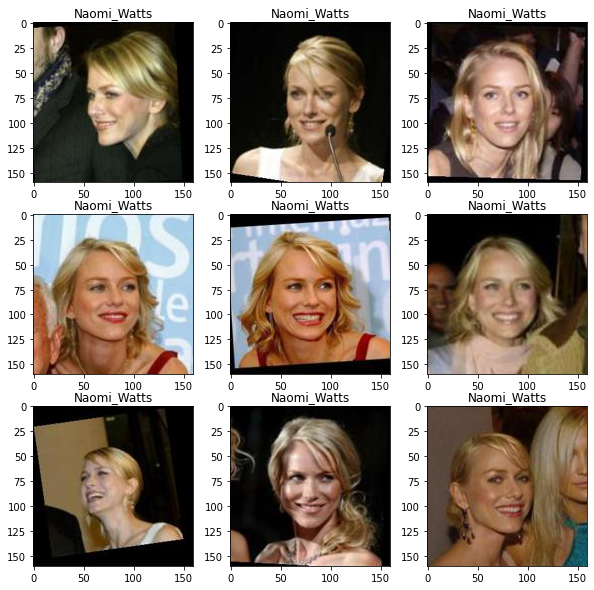

In [ ]:
mask_class = "/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Naomi_Watts"                                                 # Select Mask Image Directory
dir_path=os.listdir(mask_class)                                           # Images Name of all images in directory
img_path = [os.path.join(mask_class + "/" + img) for img in dir_path]     # Images Path of all images in directory
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3,3,i+1) 
  image = plt.imread(img_path[i])                                          # Reading Image
  plt.imshow(image)
  plt.title('Naomi_Watts')

<a id=section4></a>
# **4.Data Preprocessing**

In [11]:
datagen = ImageDataGenerator(
    rescale=1 / 255.0,      # Rescaling Image
    rotation_range=45,      # Random Rotation
    featurewise_center=True,
    featurewise_std_normalization=True,
    zoom_range=0.05,        # Zooming
    width_shift_range=0.1,  # Horiontal Shift
    height_shift_range=0.1, # Vertical Shift
    horizontal_flip=True,   # Flipping
    fill_mode="nearest"
    )

In [12]:
train_dir='/content/drive/MyDrive/INSAIDCapstoneProject/data/train'
batch_size = 16
img_height = 160
img_width = 160

In [13]:
train_generator = datagen.flow_from_directory(
    directory=train_dir,                        # Directory Path
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    subset='training',
    seed=123
)

Found 353 images belonging to 18 classes.


In [14]:
print(train_generator.class_indices)

{'Amarnath_Ch': 0, 'Angelina_Jolie': 1, 'Arnold_Schwarzenegger': 2, 'Atal_Bihari_Vajpayee': 3, 'Bill_Clinton': 4, 'Bill_Gates': 5, 'David_Beckham': 6, 'George_W_Bush': 7, 'Harish_Purohit': 8, 'Harshada_Mali': 9, 'Jennifer_Aniston': 10, 'Jennifer_Lopez': 11, 'Michael_Schumacher': 12, 'Naomi_Watts': 13, 'Serena_Williams': 14, 'Tiger_Woods': 15, 'Vladimir_Putin': 16, 'Winona_Ryder': 17}


In [15]:
val_dir='/content/drive/MyDrive/INSAIDCapstoneProject/data/val'
batch_size = 16
img_height = 160
img_width = 160

In [16]:
val_generator = datagen.flow_from_directory(
    directory=val_dir,                        # Directory Path
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    subset='training',
    seed=123
)

Found 85 images belonging to 18 classes.


In [ ]:
print(val_generator.class_indices)

{'Amarnath_Ch': 0, 'Angelina_Jolie': 1, 'Arnold_Schwarzenegger': 2, 'Atal_Bihari_Vajpayee': 3, 'Bill_Clinton': 4, 'Bill_Gates': 5, 'David_Beckham': 6, 'George_W_Bush': 7, 'Harish_Purohit': 8, 'Harshada_Mali': 9, 'Jennifer_Aniston': 10, 'Jennifer_Lopez': 11, 'Michael_Schumacher': 12, 'Naomi_Watts': 13, 'Serena_Williams': 14, 'Tiger_Woods': 15, 'Vladimir_Putin': 16, 'Winona_Ryder': 17}


In [ ]:
# function for resizing and cropping to 160X160
def resizing(imgPath):

    im = Image.open(imgPath)

    # Get size
    x, y = im.size

    # New sizes
    yNew = 160
    xNew = yNew # should be equal

    # resize
    resized= im.resize((int(xNew), int(yNew)))
    # remove original
    os.remove(imgPath)

    # save
    print("SAVE", imgPath)
    resized.save(imgPath)

In [ ]:
# image = io.imread(img_path[21])  # Read a random Image
for i in img_path:
  resizing(i)

SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20190510.jpg
SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_2112.jpg
SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20190507.jpg
SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_201905101.jpg
SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20190511.jpg
SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20201219.jpg
SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20200410.jpg
SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Angelina_Jolie/Angelina_Jolie_0018.jpg
SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Angelina_Jolie/Angelina_Jolie_0015.jpg
SAVE /content/drive/MyDrive/INSAIDCapstoneProject/data/train/Angelina_Jolie/Angelina_Jolie_0008.jpg
SAVE /content/dri

Now, we can resize the images as per our own needs using the resize() function of OpenCV.

The bigger the size of the images, more is the level of detailing in them and hence, more is the computational expense required to process these images.

Thus, due to resource limitations, generally we work with images of sizes below (250,250) and images bigger than these sizes are resized to fit the model.

<a id=section5></a>
# **5. Model Building**

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(160, 160, 3)),    # Conv 2D Block with 16 Kernals 
  tf.keras.layers.MaxPooling2D(),                                                                # Followed by a max pooling layer
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),  
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),     # Fully Connected layer
  tf.keras.layers.Dense(19,activation ='softmax')
])

In [ ]:
tf.random.set_seed(42)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 80, 80, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 20, 20, 64)      

In [ ]:
import datetime
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
!rm -rf /logs

In [ ]:
logdir="logs/Our_model/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
# `Model.compile` will be logged every N batches.
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
history=model.fit(train_generator, validation_data=val_generator, callbacks=[tb_callback],epochs=10)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
19/19 [==============================] - 30s 2s/step - loss: 2.9613 - accuracy: 0.0891 - val_loss: 3.1414 - val_accuracy: 0.0811
Epoch 2/10
19/19 [==============================] - 13s 659ms/step - loss: 2.8061 - accuracy: 0.1254 - val_loss: 2.9349 - val_accuracy: 0.0676
Epoch 3/10
19/19 [==============================] - 13s 667ms/step - loss: 2.7178 - accuracy: 0.1947 - val_loss: 2.8704 - val_accuracy: 0.1351
Epoch 4/10
19/19 [==============================] - 12s 654ms/step - loss: 2.4944 - accuracy: 0.2739 - val_loss: 2.6755 - val_accuracy: 0.1892
Epoch 5/10
19/19 [==============================] - 13s 668ms/step - loss: 2.2796 - accuracy: 0.3069 - val_loss: 2.6194 - val_accuracy: 0.2297
Epoch 6/10
19/19 [==============================] - 15s 797ms/step - loss: 2.1653 - accuracy: 0.3333 - val_loss: 2.3404 - val_accuracy: 0.2973
Epoch 7/10
19/19 [==============================] - 13s 668ms/step - loss: 2.0476 - accuracy: 0.3597 - val_loss: 2.4359 - val_accuracy: 0.1892
Ep

In [ ]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


<a id=section6></a>
# **6. Model Building using Transfer Learning**

In [17]:
# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN(min_face_size=10)
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
 


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)


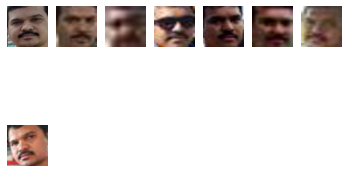

In [18]:
# demonstrate face detection on  Celebrity Faces Dataset
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN


# specify folder to plot
folder = '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/'
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	pyplot.subplot(2, 7, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

In [19]:
# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

In [20]:
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

In [21]:
# load train dataset
trainX, trainy = load_dataset('/content/drive/MyDrive/INSAIDCapstoneProject/data/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/MyDrive/INSAIDCapstoneProject/data/val/')
print(testX.shape, testy.shape)


>loaded 38 examples for class: Vladimir_Putin
>loaded 17 examples for class: Tiger_Woods
>loaded 39 examples for class: Serena_Williams
>loaded 18 examples for class: Winona_Ryder
>loaded 16 examples for class: Naomi_Watts
>loaded 23 examples for class: Bill_Clinton
>loaded 18 examples for class: Atal_Bihari_Vajpayee
>loaded 25 examples for class: David_Beckham
>loaded 15 examples for class: Jennifer_Lopez
>loaded 36 examples for class: Arnold_Schwarzenegger
>loaded 11 examples for class: Bill_Gates
>loaded 36 examples for class: George_W_Bush
>loaded 15 examples for class: Jennifer_Aniston
>loaded 12 examples for class: Michael_Schumacher
>loaded 14 examples for class: Angelina_Jolie
>loaded 5 examples for class: Harish_Purohit
>loaded 7 examples for class: Harshada_Mali
>loaded 8 examples for class: Amarnath_Ch
(353, 160, 160, 3) (353,)
>loaded 5 examples for class: Winona_Ryder
>loaded 5 examples for class: Tiger_Woods
>loaded 5 examples for class: Jennifer_Lopez
>loaded 5 examples 

In [22]:
# save arrays to one file in compressed format
savez_compressed('capstone-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

In [23]:
# load the face dataset
data = load('capstone-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (353, 160, 160, 3) (353,) (85, 160, 160, 3) (85,)


In [24]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [25]:
# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

In [26]:
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('capstone-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

(353, 128)
(85, 128)


In [27]:
# develop a classifier for the  Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('capstone-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)


Dataset: train=353, test=85


In [28]:
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=97.647


In [29]:
# load faces
data = load('capstone-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('capstone-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)


SVC(kernel='linear', probability=True)

In [30]:
import pickle
# save the model to disk
filename = 'face_detection_model_facenet.pkl'
pickle.dump(model, open(filename, 'wb'))

<a id=section7></a>
# **7. Prediction on Test Set**

Predicted: Serena_Williams (77.486)
Expected: Serena_Williams


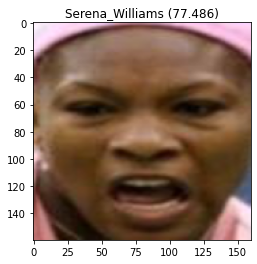

In [ ]:
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

In [31]:
image_path = '/content/drive/MyDrive/INSAIDCapstoneProject/data/train/Amarnath_Ch/Amarnath_Ch_20190507.jpg'

In [32]:
def image_prediction (model, image_path):
  new_face_array = extract_face(image_path)
  model1 = load_model('facenet_keras.h5')
  new_yhat = get_embedding(model1, new_face_array)
  new_samples = expand_dims(new_yhat, axis=0)
  new_yhat_class = model.predict(new_samples)
  new_yhat_prob = model.predict_proba(new_samples)
  new_class_index = new_yhat_class[0]
  new_class_probability = new_yhat_prob[0,new_class_index]*100
  new_predict_names = out_encoder.inverse_transform(new_yhat_class)
  print('Predicted: %s (%.3f)' % (new_predict_names[0], new_class_probability))
  return new_predict_names[0]


In [33]:
predicted_name = image_prediction(model, image_path)
print('Celebrity name is ', predicted_name)

Predicted: Amarnath_Ch (100.000)
Celebrity name is  Amarnath_Ch


In [34]:
#testing the saved & loaded model
# load the model from disk
loaded_model_facenet = pickle.load(open(filename, 'rb'))

In [35]:
image_path = '/content/BG_test2-image.jpg'

In [36]:
def image_prediction_with_loaded_model_facenet (model, image_path):
  new_face_array = extract_face(image_path)
  model1 = load_model('facenet_keras.h5')
  new_yhat1 = get_embedding(model1, new_face_array)
  new_samples = expand_dims(new_yhat1, axis=0)
  new_yhat_class1 = model.predict(new_samples)
  new_yhat_prob1 = model.predict_proba(new_samples)
  new_class_index1 = new_yhat_class1[0]
  new_class_probability1 = new_yhat_prob1[0,new_class_index1] * 100
  new_predict_names1 = out_encoder.inverse_transform(new_yhat_class1)
  print('Predicted: %s (%.3f)' % (new_predict_names1[0], new_class_probability1))
  return new_predict_names1[0], new_class_probability1

In [37]:
predicted_name1, prob1 = image_prediction_with_loaded_model_facenet(loaded_model_facenet, image_path)
print('Celebrity name is ', predicted_name1)
print('probablity is ', prob1)

Predicted: Bill_Gates (100.000)
Celebrity name is  Bill_Gates
probablity is  99.9999748478755


In [38]:
dataset_path_test = '/content/drive/MyDrive/INSAIDCapstoneProject/data/test'

In [ ]:
!ls /content/drive/MyDrive/INSAIDCapstoneProject/data/test

10.jpg	13.jpg	16.jpg	19.jpg	21.jpg	3.jpg  6.jpg  9.jpg
11.jpg	14.jpg	17.jpg	1.jpg	22.jpg	4.jpg  7.jpg
12.jpg	15.jpg	18.jpg	20.jpg	2.jpg	5.jpg  8.jpg


In [39]:
img_path_test_final=[]
list_image_test_final = os.path.join(dataset_path_test, '*')
img_path_test_final.extend(glob.glob(list_image_test_final))

In [40]:
f_name_list = []
for f in listdir(dataset_path_test):
  f_name= int( f.split('.')[0])
  f_name_list.append(f_name)
  print('file name with out extension is ', f_name)


file name with out extension is  9
file name with out extension is  22
file name with out extension is  16
file name with out extension is  6
file name with out extension is  4
file name with out extension is  20
file name with out extension is  10
file name with out extension is  8
file name with out extension is  7
file name with out extension is  11
file name with out extension is  1
file name with out extension is  21
file name with out extension is  17
file name with out extension is  15
file name with out extension is  13
file name with out extension is  14
file name with out extension is  18
file name with out extension is  12
file name with out extension is  5
file name with out extension is  19
file name with out extension is  3
file name with out extension is  2


In [41]:
sorted_f_name_list = sorted(f_name_list)

In [42]:
img_path_test_final=[]
from keras.backend import concatenate
for i in sorted_f_name_list:
  img_path_test_final.append(dataset_path_test + '/'+ str(i) + '.jpg')

In [43]:
img_path_test_final

['/content/drive/MyDrive/INSAIDCapstoneProject/data/test/1.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/2.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/3.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/4.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/5.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/6.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/7.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/8.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/9.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/10.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/11.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/12.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/13.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/14.jpg',
 '/content/drive/MyDrive/INSAIDCapstoneProject/data/test/15.jpg',
 '/content/drive/My

In [44]:
threshold_prob = 99.999
names_list=[]
names_prob = []
for test_image_path in img_path_test_final:
  print('File path under identification is ', test_image_path)
  predicted_name_test, prob_test = image_prediction_with_loaded_model_facenet(loaded_model_facenet, test_image_path)
  if prob_test < threshold_prob :
    names_list.append('Unidentified')
  else:
    names_list.append(predicted_name_test)
  names_prob.append(prob_test)


File path under identification is  /content/drive/MyDrive/INSAIDCapstoneProject/data/test/1.jpg
Predicted: Angelina_Jolie (100.000)
File path under identification is  /content/drive/MyDrive/INSAIDCapstoneProject/data/test/2.jpg
Predicted: Arnold_Schwarzenegger (100.000)
File path under identification is  /content/drive/MyDrive/INSAIDCapstoneProject/data/test/3.jpg
Predicted: Atal_Bihari_Vajpayee (100.000)
File path under identification is  /content/drive/MyDrive/INSAIDCapstoneProject/data/test/4.jpg
Predicted: Bill_Clinton (100.000)
File path under identification is  /content/drive/MyDrive/INSAIDCapstoneProject/data/test/5.jpg
Predicted: Bill_Gates (100.000)
File path under identification is  /content/drive/MyDrive/INSAIDCapstoneProject/data/test/6.jpg
Predicted: Jennifer_Lopez (56.034)
File path under identification is  /content/drive/MyDrive/INSAIDCapstoneProject/data/test/7.jpg
Predicted: David_Beckham (100.000)
File path under identification is  /content/drive/MyDrive/INSAIDCapston

In [45]:
names_prob

[99.9999651103676,
 99.99996582214567,
 99.99997671558482,
 99.99996392032868,
 99.99997770326279,
 56.03444733831208,
 99.99997314170017,
 99.99998322223739,
 25.03831138677321,
 17.979138889267343,
 99.99997464862179,
 99.99998912627673,
 86.97535799625003,
 99.34841507718396,
 48.11151588133241,
 99.99998995160273,
 99.99819140868937,
 99.85547801472626,
 99.99999484049242,
 99.99999736111349,
 99.9999990963514,
 99.99999999993236]

In [46]:
names_list

['Angelina_Jolie',
 'Arnold_Schwarzenegger',
 'Atal_Bihari_Vajpayee',
 'Bill_Clinton',
 'Bill_Gates',
 'Unidentified',
 'David_Beckham',
 'George_W_Bush',
 'Unidentified',
 'Unidentified',
 'Jennifer_Aniston',
 'Jennifer_Lopez',
 'Unidentified',
 'Unidentified',
 'Unidentified',
 'Naomi_Watts',
 'Unidentified',
 'Unidentified',
 'Serena_Williams',
 'Tiger_Woods',
 'Vladimir_Putin',
 'Winona_Ryder']

In [47]:
submission_df = pd.DataFrame (list(zip(names_list, names_prob )), columns = ['pred_names', 'pred_prob'], index=sorted_f_name_list)
#df = pd.DataFrame(list(zip(lst, lst2)),  columns =['Name', 'val'])

In [48]:
submission_df

,pred_names,pred_prob
1,Angelina_Jolie,99.999965
2,Arnold_Schwarzenegger,99.999966
3,Atal_Bihari_Vajpayee,99.999977
4,Bill_Clinton,99.999964
5,Bill_Gates,99.999978
6,Unidentified,56.034447
7,David_Beckham,99.999973
8,George_W_Bush,99.999983
9,Unidentified,25.038311
10,Unidentified,17.979139


In [49]:
submission_df.to_csv('submission_final.csv')

<a id=section8></a>
# **8. Conclusion**



- We studied **in-depth** about the various **features** from the images.

- We build different models and **compared** their performance.

- By using **transfer learning** we **reduced the time** of **training** the model and improved the accuracy of the model.

- We created our final model using **Facenet** and made predictions on the test set using it.